In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
from geopandas import GeoSeries
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
mex = gpd.read_file('/content/mexican-states.shp')
mex.columns

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: /content/mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [20]:
mexplot = mex[['name','geometry']]

<Axes: >

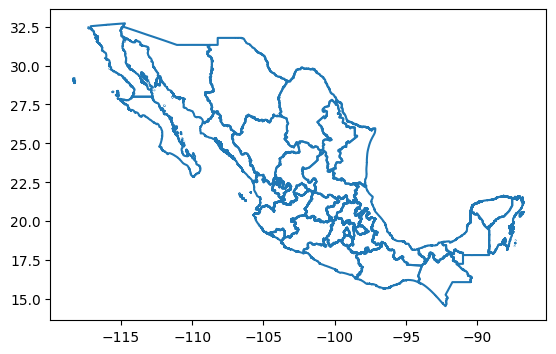

In [21]:
mexplot.boundary.plot()

In [22]:
poblacion = pd.read_csv('/content/Tabulado.csv', encoding='UTF-8-sig', sep=',', low_memory=False)
poblacion.head()

,Entidad federativa,Total,Hombres,Mujeres
0,Aguascalientes,1184996,576638,608358
1,Baja California,3155070,1591610,1563460
2,Baja California Sur,637026,325433,311593
3,Campeche,822441,407721,414720
4,Coahuila de Zaragoza,2748391,1364197,1384194


In [23]:
columns = ['Entidad federativa','Hombres','Mujeres']
poblacion = poblacion[columns]
poblacion.head()

,Entidad federativa,Hombres,Mujeres
0,Aguascalientes,576638,608358
1,Baja California,1591610,1563460
2,Baja California Sur,325433,311593
3,Campeche,407721,414720
4,Coahuila de Zaragoza,1364197,1384194


In [24]:
mexPoblacion = pd.merge(mexplot, poblacion, left_on='name', right_on='Entidad federativa')
mexPoblacion.head()


,name,geometry,Entidad federativa,Hombres,Mujeres
0,Aguascalientes,"MULTIPOLYGON (((-102.7453 21.72005, -102.74859...",Aguascalientes,576638,608358
1,Colima,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",Colima,322790,327765
2,Tlaxcala,"POLYGON ((-98.5415 19.46082, -98.54158 19.4607...",Tlaxcala,565775,604161
3,Ciudad de México,"POLYGON ((-99.2787 19.1317, -99.28259 19.13821...",Ciudad de México,4233783,4617297
4,Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",Morelos,858588,918639


<ipython-input-31-9ea69d47af04>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x=(mex_tr.centroid.apply(lambda p:p.x).values)
<ipython-input-31-9ea69d47af04>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y=(mex_tr.centroid.apply(lambda p:p.y).values)


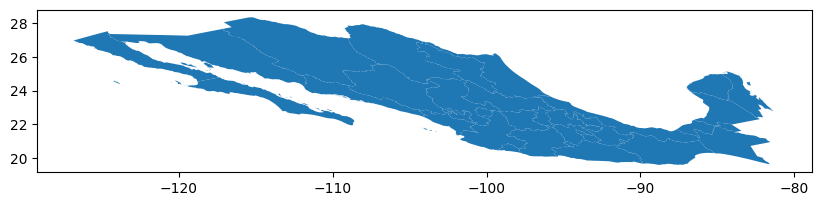

In [31]:
x0=-102.57634952
y0=23.9353719

fig,ax = plt.subplots(1,1,figsize=(10,8))

(mex["geometry"].skew(xs=-40,ys=-10,use_radians=False,origin=(x0,y0)).rotate(angle=20,use_radians=False,origin=(x0,y0)).plot(ax=ax))

mex_tr = (mex["geometry"].skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0)).rotate(angle=15,use_radians=False,origin=(x0,y0)))

x=(mex_tr.centroid.apply(lambda p:p.x).values)
y=(mex_tr.centroid.apply(lambda p:p.y).values)



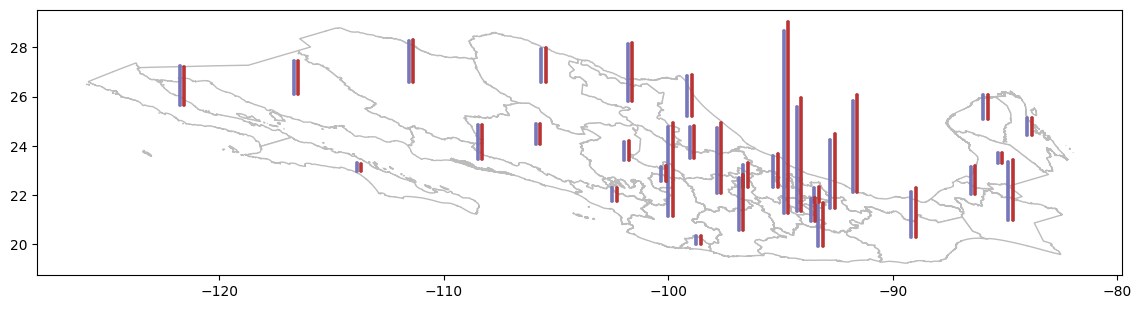

In [33]:
fig,ax = plt.subplots(1,1,figsize=(14,14))

mex_tr.plot(ax=ax,color="#ffffff",edgecolor="#bcbcbc",zorder=1)

for i in range(32):
  ax.plot([x,x],
  [y,y+(mexPoblacion['Hombres'].values/1000000)],color="#7777bb",zorder=1)

for i in range(32):
  ax.plot([x+0.2,x+0.2],
  [y,y+(mexPoblacion['Mujeres'].values/1000000)],color="#bb3333",zorder=1)

plt.show()